## CS5344 Project

### Data preprocessing

In [1]:
from src.utils import *
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
# from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\11\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\11\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)
df.head()

df.columns = ['label', 'id', 'date', 'query', 'user', 'text']
print(np.unique(df['label']))
print(np.unique(df['query']))
df = df[['text', 'label']]
df['label'][df['label'] == 4] = 1
print(np.sum(df.isnull().any(axis=1)))

[0 4]
['NO_QUERY']
0


- Removing Hashtags, Mentions, Hyperlinks
- Removeing Non-alphabetic characters
- Removing Stopwords
- Stemming
- Lemmatization

In [3]:
%%time
df = preprocess(df)

CPU times: total: 6min 23s
Wall time: 6min 28s


#### Train/Test Split

In [4]:
X, y = df['text'].to_numpy(), df['label'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### TF-IDF Vectorizing

In [5]:
%%time
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=50000)
vectoriser.fit(X_train)

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

CPU times: total: 1min 10s
Wall time: 1min 11s


#### Model Evaluation

In [6]:
def model_evaluation(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':15}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':15}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':20}, pad = 20)

### Model 1 SVM

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159815
           1       0.77      0.81      0.79    160185

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

CPU times: total: 37 s
Wall time: 39.7 s


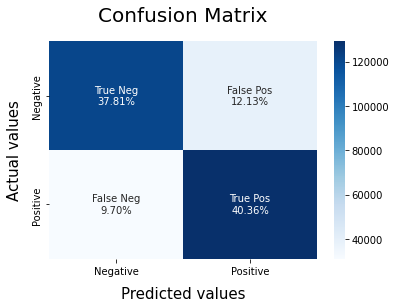

In [7]:
%%time
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
model_evaluation(model_svm)

### Model 2 Naive Bayes

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159815
           1       0.76      0.80      0.78    160185

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

CPU times: total: 1.38 s
Wall time: 1.45 s


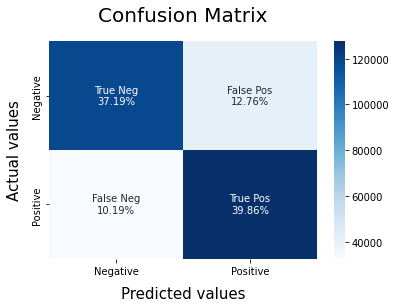

In [8]:
%%time
model_nb = BernoulliNB(alpha = 2)
model_nb.fit(X_train, y_train)
model_evaluation(model_nb)

### Model 3 

In [9]:
# %%time


UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?
